In [1]:
using BenchmarkTools
using PyPlot

In [81]:
# Calculate distance in meters between two points (ϕ1, λ1) and (ϕ2, λ2)
# on the Earth's surface using the haversine formula. ϕ denotes the latitude
# while λ denotes the longitude.
# See: http://www.movable-type.co.uk/scripts/latlong.html
function distance(ϕ1, λ1, ϕ2, λ2)
    R = 6371.228e3 # average radius of the earth [m]
    Δϕ = ϕ2 - ϕ1
    Δλ = λ2 - λ1
    a = sind(Δϕ/2)^2 + cosd(ϕ1) * cosd(ϕ2) * sind(Δλ/2)^2
    c = 2 * atan(√a, √(1-a))
    R*c
end

distance (generic function with 1 method)

In [98]:
function haversine_cpu(lat1::Float32, lon1::Float32, lat2::Float32, lon2::Float32, radius::Float32)
    c1 = cospi(lat1 / 180.0f0)
    c2 = cospi(lat2 / 180.0f0)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    d1 = sinpi(dlat / 360.0f0)
    d2 = sinpi(dlon / 360.0f0)
    t = d2 * d2 * c1 * c2
    a = d1 * d1 + t
    c = 2.0f0 * asin(min(1.0f0, sqrt(a)))
    return radius * c
end

haversine_cpu (generic function with 2 methods)

In [100]:
@benchmark distance(10, 20, 30, 40)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     116.931 ns (0.00% GC)
  median time:      121.108 ns (0.00% GC)
  mean time:        138.501 ns (0.00% GC)
  maximum time:     377.522 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     946

In [102]:
@benchmark haversine_cpu(Float32(10.0), Float32(20.0), Float32(30.0), Float32(40.0), Float32(6371.228e3))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     56.098 ns (0.00% GC)
  median time:      58.074 ns (0.00% GC)
  mean time:        66.233 ns (0.00% GC)
  maximum time:     267.457 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

In [93]:
distance(10, 20, 30, 40) ≈ haversine_cpu(Float32(10.0), Float32(20.0), Float32(30.0), Float32(40.0), Float32(6371.228e3))

true

In [76]:
function pairwise_distance_hist!(lats, lons, dist)
    @assert length(lats) == length(lons)
    
    N = length(lats)
    for i in 1:N-1, j in (i+1):N
        @inbounds dist[round(Int, 10*log10(distance(lats[i], lons[i], lats[j], lons[j])))] += 1
    end
end

pairwise_distance_hist! (generic function with 1 method)

In [ ]:
N = 10000
bins = 70

lats = 20 .+ 20 .* rand(N)
lons = 20 .+ 20 .* rand(N)
dist = zeros(bins)
pairwise_distance_hist!(lats, lons, dist)
maximum_count = maximum(dist)
@. dist = dist / maximum_count;

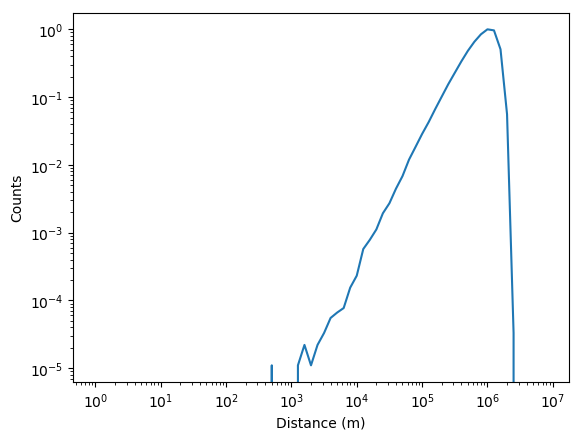

In [108]:
x = 10 .^ (collect(0:bins-1) ./ 10)
PyPlot.loglog(x, dist)
# PyPlot.loglog(x, dist, linestyle="", marker=".")
PyPlot.xlabel("Distance (m)");
PyPlot.ylabel("Counts");
# PyPlot.plot([10^3, 10^5], [10^2, 10^6], label="slope=2");

In [77]:
N = 100
bins = 100

lats = 20 .+ 20 .* rand(N)
lons = 20 .+ 20 .* rand(N)
dist = zeros(bins)
@benchmark pairwise_distance_hist!(lats, lons, dist)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     700.443 μs (0.00% GC)
  median time:      760.097 μs (0.00% GC)
  mean time:        797.308 μs (0.00% GC)
  maximum time:     1.854 ms (0.00% GC)
  --------------
  samples:          6258
  evals/sample:     1

In [78]:
N = 1000
bins = 100

lats = 20 .+ 20 .* rand(N)
lons = 20 .+ 20 .* rand(N)
dist = zeros(bins)
@benchmark pairwise_distance_hist!(lats, lons, dist)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     78.721 ms (0.00% GC)
  median time:      80.794 ms (0.00% GC)
  mean time:        81.169 ms (0.00% GC)
  maximum time:     90.328 ms (0.00% GC)
  --------------
  samples:          62
  evals/sample:     1

In [52]:
N = 10000
bins = 100

lats = 20 .+ 20 .* rand(N)
lons = 20 .+ 20 .* rand(N)
dist = zeros(bins)
@benchmark pairwise_distance_hist!(lats, lons, dist)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     8.244 s (0.00% GC)
  median time:      8.244 s (0.00% GC)
  mean time:        8.244 s (0.00% GC)
  maximum time:     8.244 s (0.00% GC)
  --------------
  samples:          1
  evals/sample:     1